# "[ML] Naive Bayesian_Korean2"
> "성능 높이기 도전(konlpy,mecab,khaiii)"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Naive Bayesian,korean,konlpy,mecab,khaiii]
- author: 도형준

# 데이터 불러오기

In [ ]:
import pandas as pd
# https://github.com/e9t/nsmc/
file_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt'
df = pd.read_csv(file_url, sep='\t', index_col=0)
df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

document    8
label       0
dtype: int64

In [ ]:
df[df['document'].isnull()]

,document,label
id,,
6369843,NaN,1
511097,NaN,1
2172111,NaN,1
402110,NaN,1
5942978,NaN,0
5026896,NaN,0
1034280,NaN,0
1034283,NaN,0


In [ ]:
df2 = df.dropna()
df2.isnull().sum()

document    0
label       0
dtype: int64

In [ ]:
df3 = pd.concat([df2.head(1000),df2.tail(1000)])
df3

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
3302770,쓰.레.기,0
5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0


In [ ]:
#df3['nouns']

# 전처리

In [ ]:
# https://konlpy.org/ko/latest/index.html
# 형태소 분석기 konlpy pip install
#!pip install konlpy --quiet

In [ ]:
# Mecab은 추가 세팅 필요
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def NB_visual_alpha_x(a,b):
  cv = CountVectorizer()
  cv.fit(a.apply(" ".join))
  x = cv.transform(a.apply(" ".join))
  y = b
  ###################################################################
  x_train, x_test, y_train, y_test = train_test_split(x, y)
  ###################################################################
  model = MultinomialNB()
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  ###################################################################
  cf_matrix=confusion_matrix(y_test, pred)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
  plt.title("CONFUSION MATRIX")
  plt.ylabel('True')
  plt.xlabel('Predicted')
  ###################################################################
  return print('accuracy_score: ',accuracy_score(y_test, pred),'\n'),plt.show()

# 모델링

accuracy_score:  0.66 



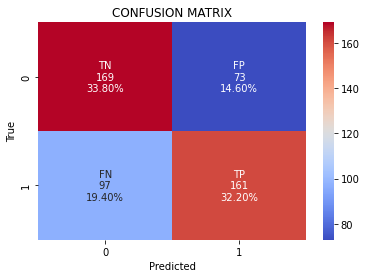

(None, None)

In [ ]:
#@title 1. 수업 시간 때 한 기본 명사만 추출한 코드
df3['nouns'] = df3.document.apply(okt.nouns)
NB_visual_alpha_x(df3['nouns'],df3['label'])

accuracy_score:  0.686 



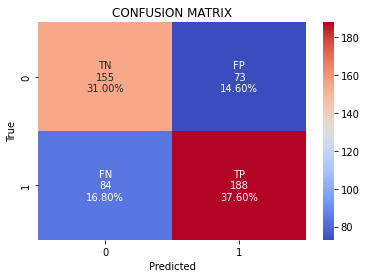

(None, None)

In [ ]:
#@title 2. len(단어)가 2이상일 때 조건 추가
df4 = pd.concat([df2.head(1000),df2.tail(1000)])
df4['nouns'] = df4.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_x(df4['nouns'],df4['label'])

accuracy_score:  0.704 



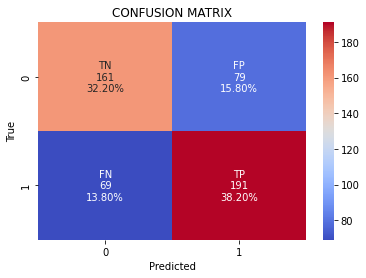

(None, None)

In [ ]:
#@title 3. 모델도 다시 선언하고 같은 데이터를 학습시켰는데, 같은 조건에도 성능이 달라진다?
df5 = pd.concat([df2.head(1000),df2.tail(1000)])
df5['nouns'] = df5.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_x(df5['nouns'],df5['label'])

In [ ]:
#@title 4. alpha값을 조정해보자자 => 함수에 c(알파값) 추가 (default = 1)

In [ ]:
def NB_visual_alpha_o(a,b,c):
  cv = CountVectorizer()
  cv.fit(a.apply(" ".join))
  x = cv.transform(a.apply(" ".join))
  y = b
  ###################################################################
  x_train, x_test, y_train, y_test = train_test_split(x, y)
  ###################################################################
  model = MultinomialNB(alpha=c) ## Laplace Smoothing 파라미터
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  ###################################################################
  cf_matrix=confusion_matrix(y_test, pred)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
  plt.title("CONFUSION MATRIX")
  plt.ylabel('True')
  plt.xlabel('Predicted')
  ###################################################################
  return print('accuracy_score: ',accuracy_score(y_test, pred),'\n'),plt.show()

accuracy_score:  0.7 



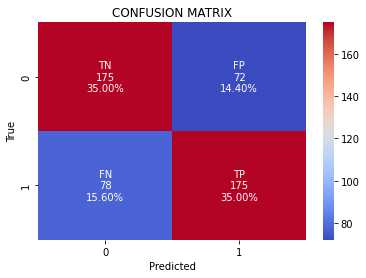

(None, None)

In [ ]:
#@title 5. alpha = 0.8
df6 = pd.concat([df2.head(1000),df2.tail(1000)])
df6['nouns'] = df6.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df6['nouns'],df6['label'],0.8)

accuracy_score:  0.692 



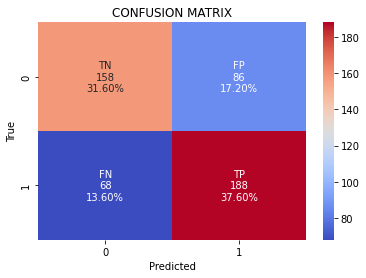

(None, None)

In [ ]:
#@title 6. alpha = 0.6

df7 = pd.concat([df2.head(1000),df2.tail(1000)])
df7['nouns'] = df7.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df7['nouns'],df7['label'],0.6)

accuracy_score:  0.64 



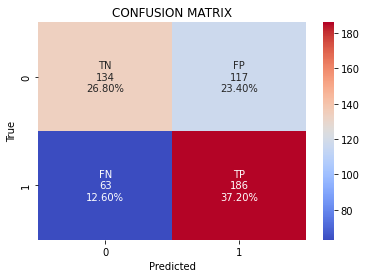

(None, None)

In [ ]:
#@title 7. alpha = 0.4

df8 = pd.concat([df2.head(1000),df2.tail(1000)])
df8['nouns'] = df8.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df8['nouns'],df8['label'],0.4)

accuracy_score:  0.668 



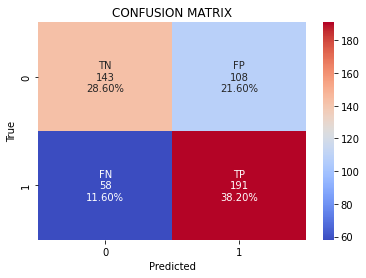

(None, None)

In [ ]:
#@title 8. alpha = 0.2
df9 = pd.concat([df2.head(1000),df2.tail(1000)])
df9['nouns'] = df9.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df9['nouns'],df9['label'],0.2)

accuracy_score:  0.692 



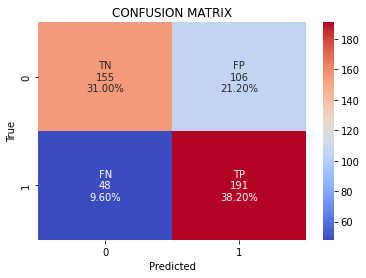

(None, None)

In [ ]:
#@title 9. alpha = 0.1

df10 = pd.concat([df2.head(1000),df2.tail(1000)])
df10['nouns'] = df10.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df10['nouns'],df10['label'],0.1)

accuracy_score:  0.674 



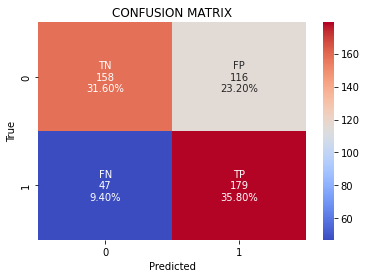

(None, None)

In [ ]:
#@title 10. alpha = 0.15
df11 = pd.concat([df2.head(1000),df2.tail(1000)])
df11['nouns'] = df11.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df11['nouns'],df11['label'],0.15)

## 현재까지 결론
- 단어는 len이 2이상일 때, alpha값이 0.2일때가 가장 높은 성능인 69.4% 정도 나온다.
  - +) 추가적으로 찾아보니 alpha값은 모델 성능에 거의 끼치지 않는다고 한다.
- 하지만 MultinomialNB의 파라미터는 alpha가 하나이므로, 전처리에 더 집중해야 성능을 올릴 수 있을 것이라 예상한다.
- or 다른 형태소 분석기를 사용해볼까?


# MECAB

In [ ]:
# 설치 후 '런타임 > 런타임 다시 시작'!
#!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

accuracy_score:  0.636 



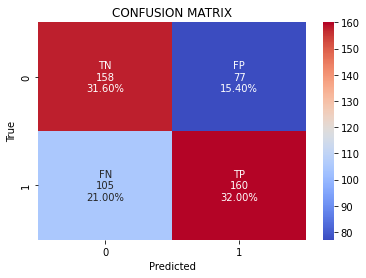

(None, None)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df12 = pd.concat([df2.head(1000),df2.tail(1000)])
df12['nouns'] = df12.document.apply(mecab.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df12['nouns'],df12['label'],0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


accuracy_score:  0.656 



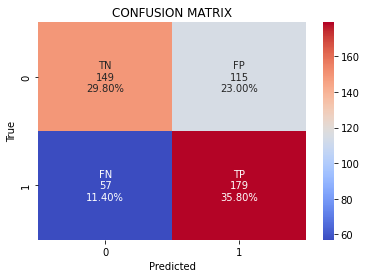

(None, None)

In [ ]:
df13 = pd.concat([df2.head(1000),df2.tail(1000)])
df13['nouns'] = df12.document.apply(mecab.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
NB_visual_alpha_o(df13['nouns'],df13['label'],0)

# Khaiii (카카오)

In [ ]:
# https://github.com/kakao/khaiii
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

from khaiii import KhaiiiApi
api = KhaiiiApi()
for word in api.analyze("안녕, 세상."):
    print(word)

[ 84%] Building CXX object CMakeFiles/test_khaiii.dir/src/test/cpp/khaiii/ErrPatchTest.cpp.o
[ 88%] Building CXX object CMakeFiles/test_khaiii.dir/src/test/cpp/khaiii/KhaiiiApiTest.cpp.o
[ 92%] Building CXX object CMakeFiles/test_khaiii.dir/src/test/cpp/khaiii/KhaiiiDevTest.cpp.o
[ 96%] Building CXX object CMakeFiles/test_khaiii.dir/src/test/cpp/khaiii/PreanalTest.cpp.o
[100%] Linking CXX executable test/khaiii
[100%] Built target test_khaiii
INFO:root:config: {
    "cutoff": 1,
    "embed_dim": 35,
    "hidden_dim": 320,
    "model_id": "munjong.cut1.win4.sdo0.1.emb35.lr0.001.lrd0.9.bs500",
    "rsc_src": "../rsc/src",
    "window": 4
}
INFO:root:vocab.in: 5621 entries, 0 cutoff
INFO:root:vocab.out: 500 entries, 0 cutoff
INFO:root:restore.dic: 4303 entries
INFO:root:preanal.manual
INFO:root:preanal.auto
INFO:root:trie saved: /content/build/share/khaiii/preanal.tri
INFO:root:total nodes: 120812
INFO:root:expected size: 1932992
INFO:root:value saved: /content/build/share/khaiii/preanal.